# The sparks Foundation- Data Science and Bussiness Analytics

## Done By - Deepanshu

### Prediction using Supervised Ml

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [24]:
data=pd.read_csv("student_scores - student_scores.csv")

In [25]:
x=data.iloc[:,0].values
y=data.iloc[:,1].values

In [26]:
x.shape


(25,)

In [27]:
y.shape

(25,)

In [28]:
from sklearn import model_selection
X_train,X_test,Y_train,Y_test= model_selection.train_test_split(x,y,test_size=0.2,random_state=0)


In [29]:
def fit(X_train,Y_train):
    num=(X_train*Y_train).mean()-Y_train.mean()*X_train.mean()
    den=(X_train**2).mean()-X_train.mean()**2
    m=num/den
    c=Y_train.mean()-(m*X_train).mean()
    return m,c

In [30]:
def predict(x,m,c):
    return m*x+c
def score(y_truth,y_pred):
    u=((y_truth-y_pred)**2).sum()
    v=((y_truth-y_truth.mean())**2).sum()
    return 1-u/v
def cost(x,y,m,c):
    return ((y-(m*x)-c)**2).mean()

In [31]:
m,c=fit(X_train,Y_train)
y_test_pred=predict(X_test,m,c)
print("Test score",score(Y_test,y_test_pred))

y_train_pred=predict(X_train,m,c)
print("Train score",score(Y_train,y_train_pred))

print("Cost is " , cost(X_train,Y_train,m,c))
print(m,c)

Test score 0.9454906892105357
Train score 0.9515510725211553
Cost is  30.89818237731449
9.910656480642224 2.0181600414347542


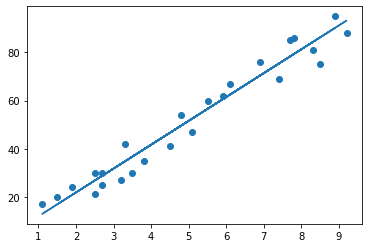

In [32]:
line=m*x+c
plt.plot(x,line)
plt.scatter(x,y)
plt.show()

In [33]:
print(X_test) # Testing data - In Hours
#y_pred = regressor.predict(X_test)

[1.5 3.2 7.4 2.5 5.9]


In [34]:
m1,c1=fit(X_test,Y_test)

In [35]:
m1,c1

(8.86232481450948, 5.264468260511137)

In [36]:
y_pred=predict(X_test,m1,c1)

In [37]:
y_pred

array([18.55795548, 33.62390767, 70.84567189, 27.4202803 , 57.55218467])

In [38]:
Y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [39]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,18.557955
1,27,33.623908
2,69,70.845672
3,30,27.420280
4,62,57.552185


In [40]:
hours = 9.25
own_pred = predict(hours,m,c)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred))

No of Hours = 9.25
Predicted Score = 93.69173248737533


In [41]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, y_pred))

Mean Absolute Error: 3.387831821929102
